# **Libraries and Dataset**

In [1]:
# Install ta-lib when using Google Colab
# !wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
# !wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
# !dpkg -i libta.deb ta.deb
# !pip install ta-lib

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
import talib as ta

In [7]:
# Read dataset
df_raw = pd.read_csv("../data/raw_datasets/dataset_full.csv")
df_raw

,date,purchase_price,selling_price,exchange_rate,xauusd
0,2014-01-01,34.70,34.95,20835.0,1209.006691
1,2014-01-02,34.95,35.05,21055.0,1224.088499
2,2014-01-03,35.02,35.10,21050.0,1237.028331
3,2014-01-04,35.08,35.18,NaN,1237.462953
4,2014-01-05,35.10,35.25,NaN,1237.600787
...,...,...,...,...,...
3684,2024-02-02,76.40,78.70,24400.0,2039.099737
3685,2024-02-03,75.90,78.30,NaN,2039.833460
3686,2024-02-04,NaN,NaN,NaN,2040.174296
3687,2024-02-05,76.20,78.40,24335.0,2024.960063


# **src**

## **preprocessing**

## **utils**

In [ ]:
def missing_value_percentage(dataframe):
    """
    Function to calculate the percentage of missing values for each column in the DataFrame.

    Parameters:
        - dataframe (pd.DataFrame): DataFrame for which missing values percentage needs to be calculated.

    Returns:
        - pd.DataFrame: DataFrame with two columns - column name and its percentage of missing values.
    """
    # Calculate the percentage of missing values for each column
    missing_percentages = (dataframe.isnull().mean() * 100).round(2)

    # Create a DataFrame with column names and their corresponding missing value percentages
    result_df = pd.DataFrame({'Column Name': missing_percentages.index, 'Missing Percentage': missing_percentages.values})

    return result_df

In [ ]:
def plot_time_series(
    df,
    column_name,
    chart_name,
    x_title,
    y_title
    ):

    """
    Function to plot a time series.

    Parameters:
        - df (pandas.DataFrame): The DataFrame containing the time series data.
        - column_name (str): The name of the column containing the time series data.
        - chart_name (str): The title of the chart.
        - x_title (str): The title of the x-axis.
        - y_title (str): The title of the y-axis.

    Returns: None
    """
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df[column_name], mode='lines', name=chart_name))

    # Add title and labels
    fig.update_layout(title=chart_name,
                      xaxis_title=x_title,
                      yaxis_title=y_title)

    fig.show()

In [ ]:
def plot_df(
    df,
    title,
    x_title,
    y_title
    ):
    
    """
    Function to plot a DataFrame with multiple columns.

    Parameters:
        - df (pandas.DataFrame): The DataFrame to be plotted.
        - title (str): The title of the plot.
        - x_title (str): The title of the x-axis.
        - y_title (str): The title of the y-axis.

    Returns:
    None
    """

    # Create traces for each column
    traces = []
    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode='lines', name=column)
        traces.append(trace)

    # Create the figure and plot
    fig = go.Figure(data=traces)

    # Add title and labels
    fig.update_layout(title=title,
                        xaxis_title=x_title,
                        yaxis_title=y_title)

    # Show the plot
    fig.show()

In [ ]:
# Assessing forecastability
import warnings
def calc_cov(x):
    """
    Calculate the coefficient of variation (COV) for a given array to assess forecastability 
    The coefficient of variation (COV) is defined as the ratio of the standard deviation to the mean.

    Parameters:
        - x (array): The input array for which the COV is to be calculated.

    Returns:
        - float: The coefficient of variation (COV) of the input array.

    Raises:
        - UserWarning: Warns that COV will be Na if the input array has less than 2 non-zero elements 
    """
    if (len(x) <= 2) and np.all(x == 0):
        warnings.warn(
            "Array should not be all zeroes or should at least more than 1 data point. COV will be NaN"
        )
        cov = np.nan
    else:
        cov = np.std(x) / np.mean(x)
    return cov

## **eda**

In [9]:
def ts_plot_acf(series, lags, fft=False, return_values=False):
  """
  Plot the autocorrelation function (ACF) for a time series.

  Parameters:
    - series (pd.Series): The time series data.
    - lags (int): The number of lags to include in the ACF plot.
    - fft (bool, optional): Whether to use fast Fourier transform for the computation (default is False).
    - return_values (bool, optional): Whether to return the autocorrelation values (default is False).

  Returns:
    - array-like or None: The autocorrelation values if return_values is True, otherwise None.
  """
  
  plt.rcParams['figure.figsize'] = [15, 3]
  plot_acf(x=series, lags=lags, fft=fft)
  plt.show()

  if return_values:
    return acf(x=series, nlags=lags, fft=fft)

In [10]:
def ts_plot_pacf(series, lags, fft=False, return_values=False):
  """
  Plot the partial autocorrelation function (PACF) for a time series.

  Parameters:
    - series (array-like): The time series data.
    - lags (int): The number of lags to include in the PACF plot.
    - fft (bool, optional): Whether to use fast Fourier transform for the computation (default is False).
    - return_values (bool, optional): Whether to return the partial autocorrelation values (default is False).

  Returns:
    - array-like or None: The partial autocorrelation values if return_values is True, otherwise None.
  """
  plt.rcParams['figure.figsize'] = [15, 3]
  plot_pacf(x=series, lags=lags)
  plt.show()

  if return_values:
    return pacf(x=series, nlags=lags)

In [11]:
def find_integration_order(
    df: pd.DataFrame,
    significance_level=0.05
) -> pd.DataFrame:
    
    """
    Find the order of integration for a time series (the number of times a time series needs to be differenced to achieve stationarity)

    Parameters:
        - df (pd.DataFrame): The DataFrame containing the time series data.
        - significance_level (float, optional): The significance level for the Augmented Dickey-Fuller (ADF) test (default is 0.05).

    Returns:
        - pd.DataFrame: A DataFrame summarizing the integration order for each column in the input DataFrame.
    """

    results = []

    df = df.dropna()

    # Perform ADF Test over and over again until the time series is stationary
    # The order of integration is the number of times ADF needs to be performed to make the time series stationary
    for col in df.columns:
        series = df[col]
        order = 0

        while True:
            result_adf = adfuller(series)
            p_value = result_adf[1]

            if p_value <= significance_level:
                break
            else:
                series = series.diff().dropna()  # Differencing to make it stationary
                order += 1

        # Summarize the result into a table
        results.append({'Column Name': col, 'Integration Order': order})

    result_df = pd.DataFrame(results)

    return result_df

In [4]:
from statsmodels.tsa.seasonal import STL

def decompose_loess(time_series, alpha=0.4, model='additive', plot=True, return_values=False):
    """
    Decomposes a time series into trend, seasonality, and residual components using Loess (Local Regression).

    Parameters:
        - time_series (pandas.Series): Time series data to decompose.
        - freq (int, optional): The frequency of the time series. 
        - alpha (float, optional): Smoothing parameter (between 0 and 1) for Loess. Default is 0.4.
        - plot (bool, optional): Whether to plot the decomposition components. Default is True.

    Returns:
        - trend (pandas.Series): The trend component of the time series.
        - seasonal (pandas.Series): The seasonal component of the time series.
        - residual (pandas.Series): The residual component of the time series.
    """
    # If frequency is not provided, infer it

    # Decompose using STL
    stl_result = STL(time_series, robust=True).fit()

    trend = stl_result.trend
    seasonal = stl_result.seasonal
    residual = stl_result.resid

    if plot:
        # Plot the decomposition components
        plt.figure(figsize=(12, 8))
        plt.subplot(411)
        plt.plot(time_series, label='Original', color='blue')
        plt.legend(loc='upper left')
        plt.subplot(412)
        plt.plot(trend, label='Trend', color='red')
        plt.legend(loc='upper left')
        plt.subplot(413)
        plt.plot(seasonal, label='Seasonality', color='green')
        plt.legend(loc='upper left')
        plt.subplot(414)
        plt.plot(residual, label='Residuals', color='black')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()
        
    if return_values:
      return trend, seasonal, residual

## **feature engineering**

### **datetime features**

In [15]:
# Extract datetime features
def create_dt_features(df):
    """
    Create date-time features from the datetime index of a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame with a datetime index.

    Returns:
    - pandas.DataFrame: A copy of the input DataFrame with additional date-time features added as columns.
    """
    
    df_temp = df.copy()

    df_temp['dayofweek'] = df_temp.index.dayofweek
    df_temp['quarter'] = df_temp.index.quarter
    df_temp['month'] = df_temp.index.month
    df_temp['dayofyear'] = df_temp.index.dayofyear
    df_temp['dayofmonth'] = df_temp.index.day
    df_temp['weekofyear'] = df_temp.index.isocalendar().week

    return df_temp

In [16]:
# Cyclical encoding
def encode(data, col, max_val):
    """
    Encode cyclic features using sine and cosine.

    Parameters:
    - data (pandas.DataFrame): The DataFrame containing the data to be encoded.
    - col (str): The name of the column containing the cyclic feature to be encoded.
    - max_val (float): The maximum value of the cyclic feature.

    Returns:
    - pandas.DataFrame: A copy of the input DataFrame with the cyclic feature encoded as sine and cosine components.
    """
    df = data.copy()
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

def create_cyclical_features(df, column_max_values, drop_features=False):
    """
    Create cyclical encoding features for specified columns in the DataFrame.

    Parameters:
      - df (pandas.DataFrame): Input DataFrame.
      - column_max_values (dict): Dictionary mapping column names to their maximum values for cyclical encoding.
        Examples: max_values = {
                          'dayofweek': df_test.index.dayofweek.max(),
                          'quarter': df_test.index.quarter.max(),
                          'month': df_test.index.month.max(),
                          'dayofyear': df_test.index.dayofyear.max(),
                          'dayofmonth': df_test.index.day.max(),
                          'weekofyear': df_test.index.isocalendar().week.max()
                          }

    Returns:
      - pandas.DataFrame: DataFrame with added cyclical encoding features.
    """
    df_temp = df.copy()

    features_to_drop = []

    for column, max_val in column_max_values.items():
        df_temp = encode(df_temp, column, max_val)
        features_to_drop.append(column)

    if drop_features:
      df_temp = df_temp.drop(features_to_drop, axis=1)

    return df_temp

def cyclical_features_plot(df, columns, sample=100):
  """
  Plot cyclical features from a DataFrame.

  Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    - columns (list): A list of column names containing the cyclical features to be plotted.
    - sample (int, optional): The number of data points to be plotted (default is 100).

  Returns:
    None
  """

  data = df.copy()
  data = data[:sample+1]

  # Plot a single sine or cosine wave
  if len(columns) == 1:
    data[columns[0]].plot()

  # Plot both sine and cosine wave to create a cycle (circle visualization)
  if len(columns) == 2:
    data.plot.scatter(columns[0], columns[1]).set_aspect('equal')

### **technical indicators**

In [19]:
# function to compute technical indicators for adjusted close price

def create_technical_indicators(
    df,
    column_name:str,
    config
    ):

    """
    Compute technical indicators for a given column in a DataFrame.

    Parameters:
      - df (pandas.DataFrame): The DataFrame containing the data.
      - column_name (str): The name of the column for which technical indicators are computed.
      - config (dict): A dictionary specifying the parameters for computing technical indicators.
          Example:
            config = {
                  'sma_period': [7, 14, 31],
                  'rsi_period': [14],
                  'bband_period': [20],
                  'bband_std': [[2, 2]],
                  'mom_period': [10],
                  'macd_period': [[12, 26, 9]]
                }

    Returns:
      - pandas.DataFrame: A copy of the input DataFrame with computed technical indicators added as columns.
    """

    # Get param values
    sma_period = config['sma_period']
    rsi_period = config['rsi_period']
    bband_period = config['bband_period']
    bband_std = config['bband_std']
    mom_period = config['mom_period']
    macd_period = config['macd_period']

    data = df.copy()

    # SMA
    if len(sma_period) > 0:
      for i_sma in sma_period:
        data[f'SMA_{column_name}_{i_sma}'] = data[column_name].rolling(window=i_sma).mean()

    # RSI
    if len(rsi_period) > 0:
      for i_rsi in rsi_period:
        data[f'RSI_{column_name}_{i_rsi}'] = ta.RSI(data[column_name].values, timeperiod=i_rsi)

    # Calculate the Bollinger Bands
    if len(bband_std) > 0 and len(bband_period) > 0:
      for i_bband_std in bband_std:
        for i_bband in bband_period:
          upper, middle, lower = ta.BBANDS(data[column_name], timeperiod=i_bband, nbdevup=i_bband_std[0], nbdevdn=i_bband_std[1])
          data[f'Upper_Band_{column_name}_{i_bband}'] = upper
          data[f'Middle_Band_{column_name}_{i_bband}'] = middle
          data[f'Lower_Band_{column_name}_{i_bband}'] = lower

    # Calculate the Moving Average Convergence Divergence (MACD) with default parameters
    if len(macd_period) > 0:
      for i_macd in macd_period:
        macd, macdsignal, macdhist = ta.MACD(data[column_name], i_macd[0], i_macd[1], i_macd[2])
        data[f'MACD_{column_name}_{i_macd[0]}_{i_macd[1]}_{i_macd[2]}'] = macd


    # Calculate the Momentum Oscillator with a period
    if len(mom_period) > 0:
      for i_mom in mom_period:
        mom = ta.MOM(data[column_name], timeperiod=i_mom)
        data[f'MoM_{column_name}_{i_mom}'] = mom

    return data


### **gold price features**

In [20]:
def create_diff_price(
    df,
    drop_features=False
    ):
  
    """
    Create additional features based on price differences.

    Parameters:
      - df (pandas.DataFrame): The DataFrame containing the data.
      - drop_features (bool, optional): Whether to drop xauusd features after creating new ones (default is False).

    Returns:
      - pandas.DataFrame: A copy of the input DataFrame with additional features representing price differences.
    """
    data = df.copy()

    data['purchase_sell_diff'] = data['selling_price'] - data['purchase_price']
    data['converted_xauusd'] = (data['xauusd']*data['exchange_rate'])/1000000
    data['domestic_world_diff'] = data['selling_price'] - data['converted_xauusd']

    if drop_features:
      data = data.drop(['xauusd'], axis=1)

    return data

# **Preprocessing**

In [21]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689 entries, 0 to 3688
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3689 non-null   object 
 1   purchase_price  3084 non-null   float64
 2   selling_price   3084 non-null   float64
 3   exchange_rate   2634 non-null   float64
 4   xauusd          3689 non-null   float64
dtypes: float64(4), object(1)
memory usage: 144.2+ KB


In [22]:
# Convert to datetime data type and set date as index
df_raw['date'] = pd.to_datetime(df_raw['date'])
df_raw = df_raw.set_index("date")
df_raw.head(5)

,purchase_price,selling_price,exchange_rate,xauusd
date,,,,
2014-01-01,34.70,34.95,20835.0,1209.006691
2014-01-02,34.95,35.05,21055.0,1224.088499
2014-01-03,35.02,35.10,21050.0,1237.028331
2014-01-04,35.08,35.18,NaN,1237.462953
2014-01-05,35.10,35.25,NaN,1237.600787


In [23]:
# Select data from 2020
df_raw = df_raw.loc['2020-01-01':]
df_raw.head(5)

,purchase_price,selling_price,exchange_rate,xauusd
date,,,,
2020-01-01,NaN,NaN,23171.0,1519.075794
2020-01-02,42.3,42.8,23171.0,1528.745613
2020-01-03,42.6,43.0,23171.0,1550.407994
2020-01-04,42.9,43.3,NaN,1551.313575
2020-01-05,NaN,NaN,NaN,1569.538399


In [24]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1498 entries, 2020-01-01 to 2024-02-06
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   purchase_price  1246 non-null   float64
 1   selling_price   1246 non-null   float64
 2   exchange_rate   1070 non-null   float64
 3   xauusd          1498 non-null   float64
dtypes: float64(4)
memory usage: 58.5 KB


In [25]:
# Summary statistics 
df_raw.describe()

,purchase_price,selling_price,exchange_rate,xauusd
count,1246.000000,1246.000000,1070.000000,1498.000000
mean,60.701292,61.474414,23366.487929,1834.625582
std,7.851430,8.023969,529.935140,117.719377
min,42.300000,42.800000,22394.345703,1470.604224
25%,55.800000,56.300000,23020.000000,1763.363110
50%,61.000000,61.700000,23204.000000,1832.820389
75%,66.600000,67.300000,23570.000000,1925.922288
max,77.800000,79.600000,24871.000000,2085.540095


In [ ]:
df_raw.tail(5)

,purchase_price,selling_price,exchange_rate,xauusd
date,,,,
2024-02-02,76.4,78.7,24400.0,2039.099737
2024-02-03,75.9,78.3,NaN,2039.833460
2024-02-04,NaN,NaN,NaN,2040.174296
2024-02-05,76.2,78.4,24335.0,2024.960063
2024-02-06,76.5,78.7,24370.0,2036.074351


## **Missing values**

In [ ]:
# Missing values percentage
missing_value_percentage(df_raw)

,Column Name,Missing Percentage
0,purchase_price,16.82
1,selling_price,16.82
2,exchange_rate,28.57
3,xauusd,0.00


<Axes: >

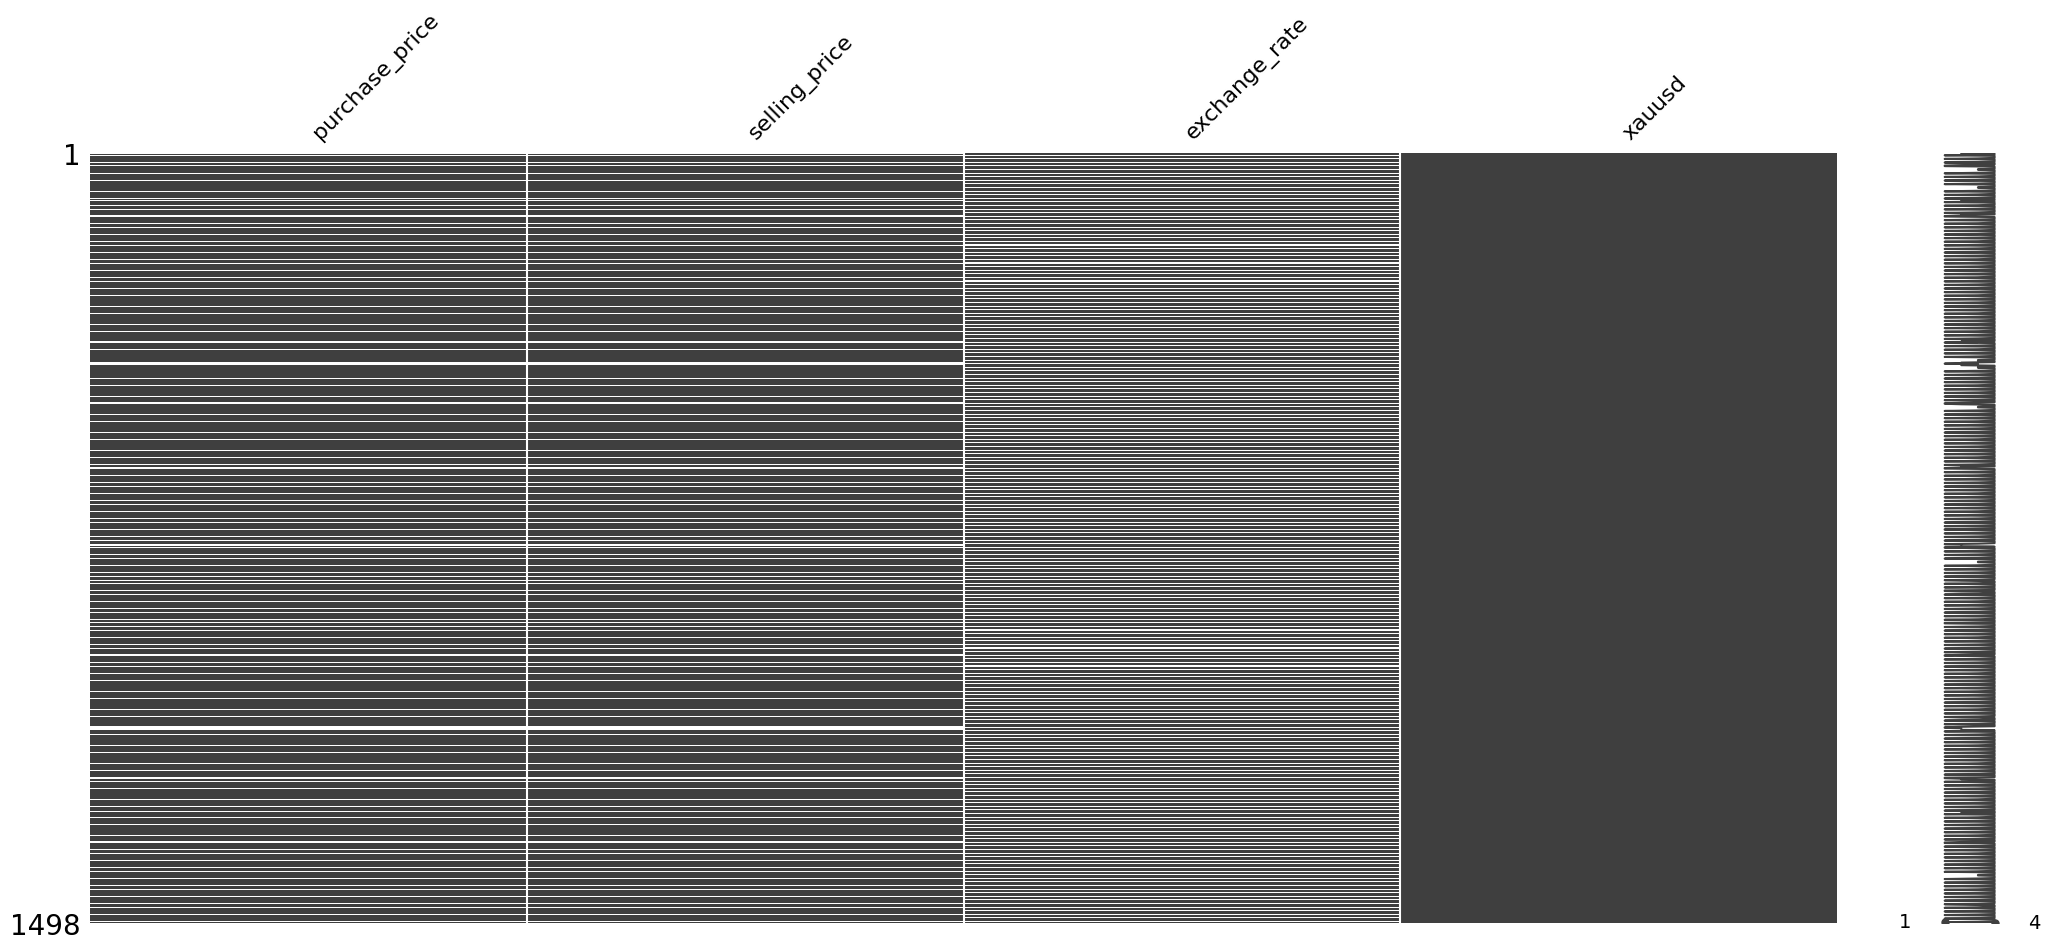

In [ ]:
# Missing value position visualization
msno.matrix(df_raw)

In [ ]:
# Forward fill the values from the previous time point
df_filled = df_raw.ffill()
df_filled.head(5)

,purchase_price,selling_price,exchange_rate,xauusd
date,,,,
2020-01-01,NaN,NaN,23171.0,1519.075794
2020-01-02,42.3,42.8,23171.0,1528.745613
2020-01-03,42.6,43.0,23171.0,1550.407994
2020-01-04,42.9,43.3,23171.0,1551.313575
2020-01-05,42.9,43.3,23171.0,1569.538399


In [ ]:
# Drop the first row because of NaN values 
df_filled = df_filled[1:]
df_filled.head(5)

,purchase_price,selling_price,exchange_rate,xauusd
date,,,,
2020-01-02,42.30,42.8,23171.0,1528.745613
2020-01-03,42.60,43.0,23171.0,1550.407994
2020-01-04,42.90,43.3,23171.0,1551.313575
2020-01-05,42.90,43.3,23171.0,1569.538399
2020-01-06,43.85,44.3,23171.0,1564.521440


In [ ]:
# Missing values percentage after being filled
missing_value_percentage(df_filled)

,Column Name,Missing Percentage
0,purchase_price,0.0
1,selling_price,0.0
2,exchange_rate,0.0
3,xauusd,0.0


<Axes: >

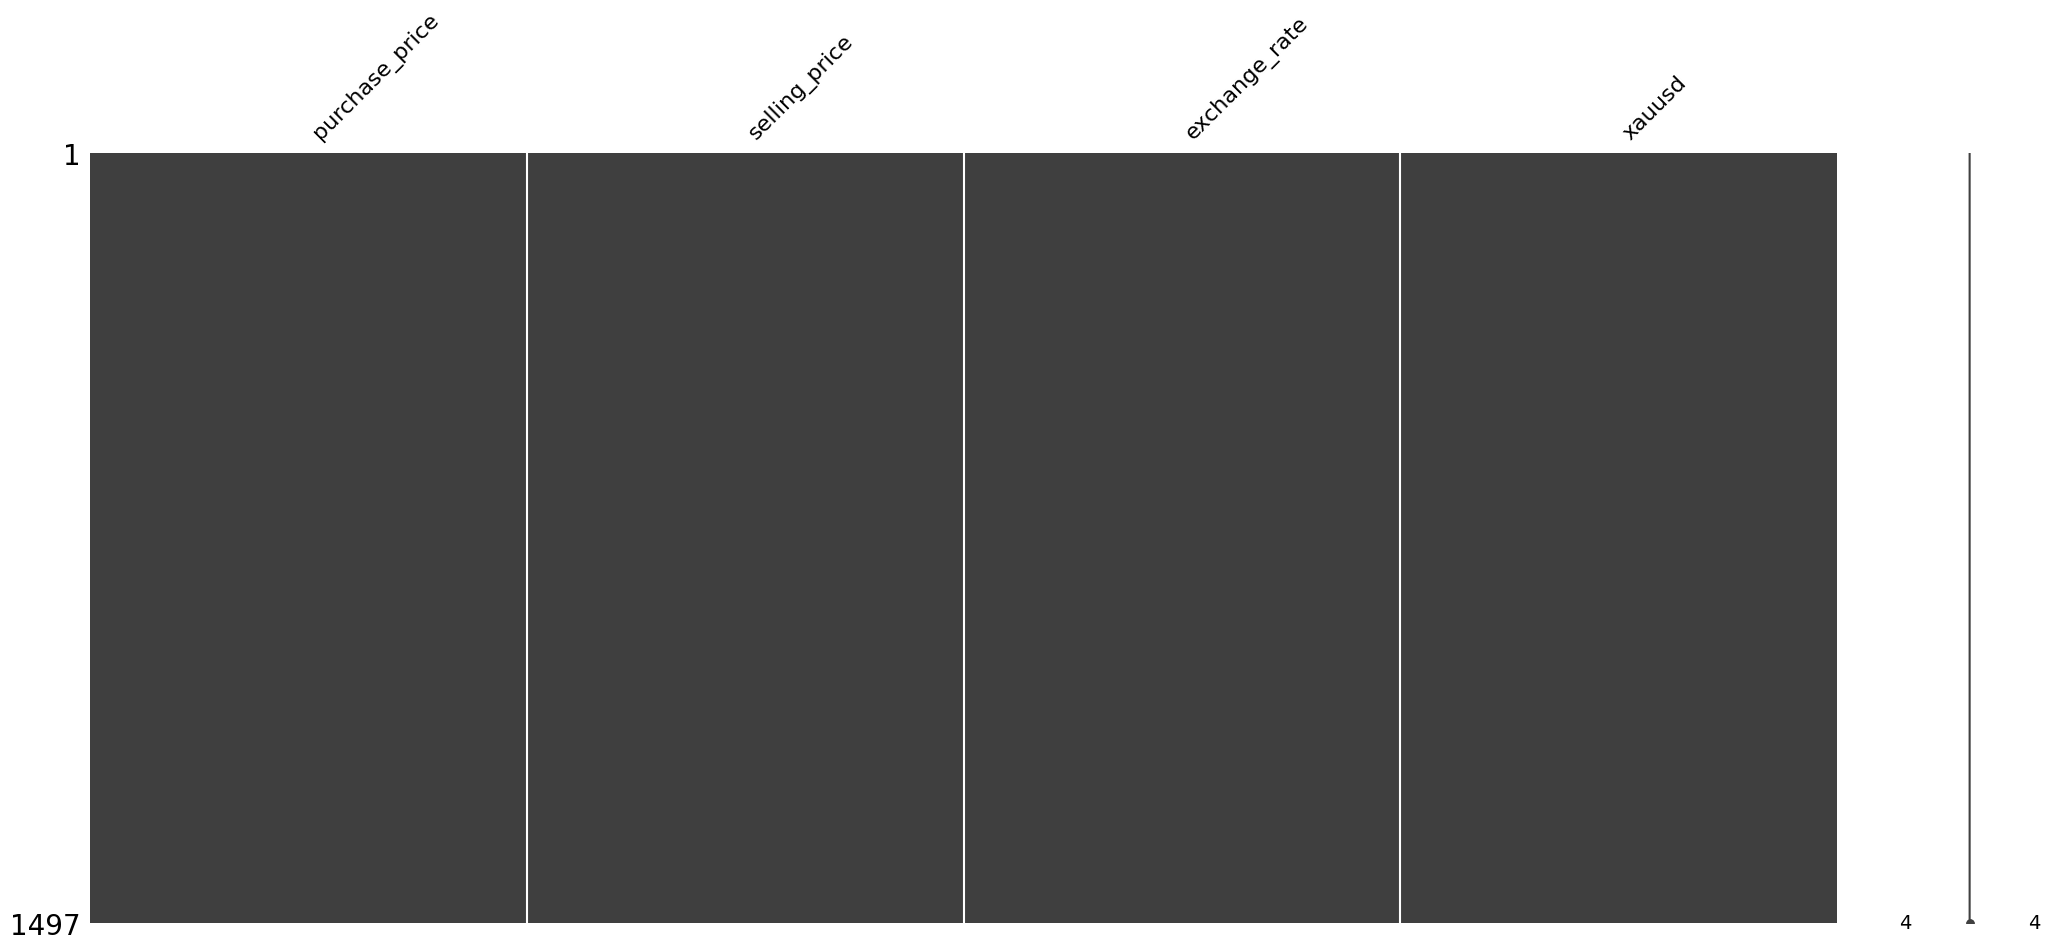

In [ ]:
# Missing values visualization after being filled
msno.matrix(df_filled)

In [ ]:
# Visualization of data
plot_df(
    df=df_filled,
    title='Dataset: Gold prices and covariates visualization',
    x_title='Date',
    y_title='Values'
    )

# **EDA**

In [ ]:
df_filled.head(5)

,purchase_price,selling_price,exchange_rate,xauusd
date,,,,
2020-01-02,42.30,42.8,23171.0,1528.745613
2020-01-03,42.60,43.0,23171.0,1550.407994
2020-01-04,42.90,43.3,23171.0,1551.313575
2020-01-05,42.90,43.3,23171.0,1569.538399
2020-01-06,43.85,44.3,23171.0,1564.521440


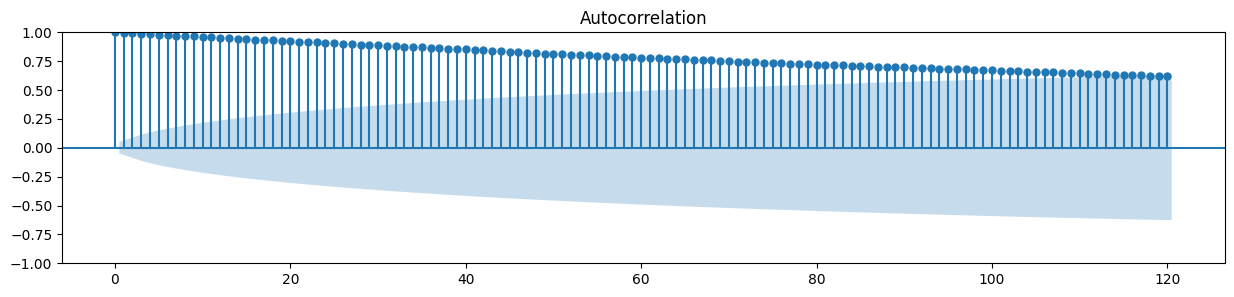

In [ ]:
# Plot ACF of selling price
acf_values = ts_plot_acf(series=df_filled['selling_price'], lags=120, return_values=True)

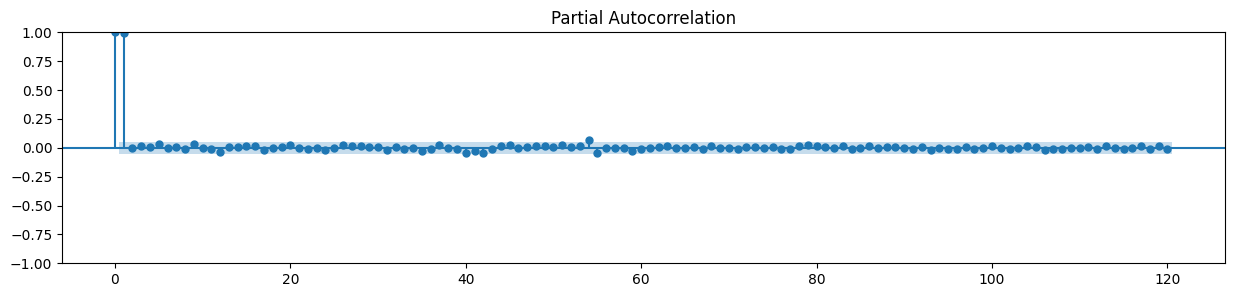

In [ ]:
# Plot PACF of selling price
pacf_values = ts_plot_pacf(series=df_filled['selling_price'], lags=120, return_values=True)

In [ ]:
# If order of integration > 1 the time series is non-stationary
find_integration_order(df_filled[['selling_price']])

,Column Name,Integration Order
0,selling_price,1


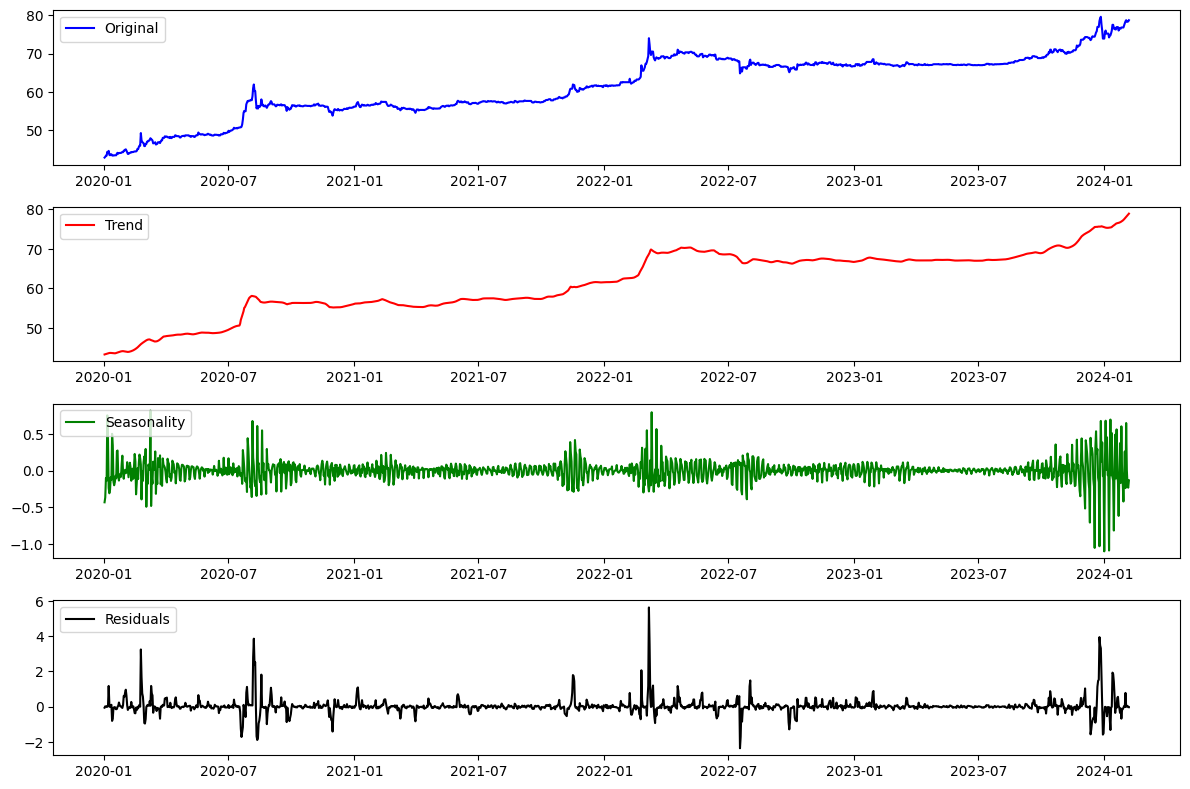

In [ ]:
# Decompose time series
trend,_,_ = decompose_loess(time_series=df_filled['selling_price'], alpha=0.4, plot=True, return_values=True)

# **Feature Engineering**

In [ ]:
# New dataframe to contain newly created features 
df_engineered = df_filled.copy()

In [ ]:
# Create datetime features
df_engineered = create_dt_features(df_engineered)

In [ ]:
# Create cyclical datetime features
# This is for demonstration as cyclic features will be effective for Neural Networks, and barely improve performance of tree-based models 
max_values = {
              'dayofweek': df_engineered.index.dayofweek.max(),
              'quarter': df_engineered.index.quarter.max(),
              'month': df_engineered.index.month.max(),
              'dayofyear': df_engineered.index.dayofyear.max(),
              'dayofmonth': df_engineered.index.day.max(),
              'weekofyear': df_engineered.index.isocalendar().week.max()
            }
df_engineered = create_cyclical_features(df_engineered, max_values)

In [ ]:
# Create technical indicators
# Define the technical indicators and their parameters
ta_config = {
          'sma_period': [7, 14, 31],
          'rsi_period': [], # [14]
          'bband_period': [20],
          'bband_std': [[2,2]],
          'mom_period': [], # [10],
          'macd_period':[] # [[12,26,9]]
      }

# Create new technical indicators 
df_engineered = create_technical_indicators(
    df=df_engineered,
    column_name='selling_price',
    config=ta_config
    )

In [ ]:
# Create price features
df_engineered = create_diff_price(
    df=df_engineered,
    drop_features=True
    )

In [ ]:
df_engineered

,purchase_price,selling_price,exchange_rate,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,dayofweek_sin,...,weekofyear_cos,SMA_selling_price_7,SMA_selling_price_14,SMA_selling_price_31,Upper_Band_selling_price_20,Middle_Band_selling_price_20,Lower_Band_selling_price_20,purchase_sell_diff,converted_xauusd,domestic_world_diff
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,42.30,42.8,23171.0,3,1,1,2,2,1,1.224647e-16,...,0.992981,NaN,NaN,NaN,NaN,NaN,NaN,0.50,35.422565,7.377435
2020-01-03,42.60,43.0,23171.0,4,1,1,3,3,1,-8.660254e-01,...,0.992981,NaN,NaN,NaN,NaN,NaN,NaN,0.40,35.924504,7.075496
2020-01-04,42.90,43.3,23171.0,5,1,1,4,4,1,-8.660254e-01,...,0.992981,NaN,NaN,NaN,NaN,NaN,NaN,0.40,35.945487,7.354513
2020-01-05,42.90,43.3,23171.0,6,1,1,5,5,1,-2.449294e-16,...,0.992981,NaN,NaN,NaN,NaN,NaN,NaN,0.40,36.367774,6.932226
2020-01-06,43.85,44.3,23171.0,0,1,1,6,6,2,0.000000e+00,...,0.972023,NaN,NaN,NaN,NaN,NaN,NaN,0.45,36.251526,8.048474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02,76.40,78.7,24400.0,4,1,2,33,2,5,-8.660254e-01,...,0.829406,77.542857,77.078571,76.404839,78.317442,76.965,75.612558,2.30,49.754034,28.945966
2024-02-03,75.90,78.3,24400.0,5,1,2,34,3,5,-8.660254e-01,...,0.829406,77.757143,77.178571,76.479032,78.461674,77.005,75.548326,2.40,49.771936,28.528064
2024-02-04,75.90,78.3,24400.0,6,1,2,35,4,5,-2.449294e-16,...,0.829406,77.971429,77.278571,76.579032,78.635747,77.095,75.554253,2.40,49.780253,28.519747


In [ ]:
# Check for stationarity in time-series features 
find_integration_order(df_engineered)

,Column Name,Integration Order
0,purchase_price,1
1,selling_price,1
2,exchange_rate,1
3,dayofweek,0
4,quarter,0
5,month,0
6,dayofyear,0
7,dayofmonth,0
8,weekofyear,0
9,dayofweek_sin,0


<Axes: >

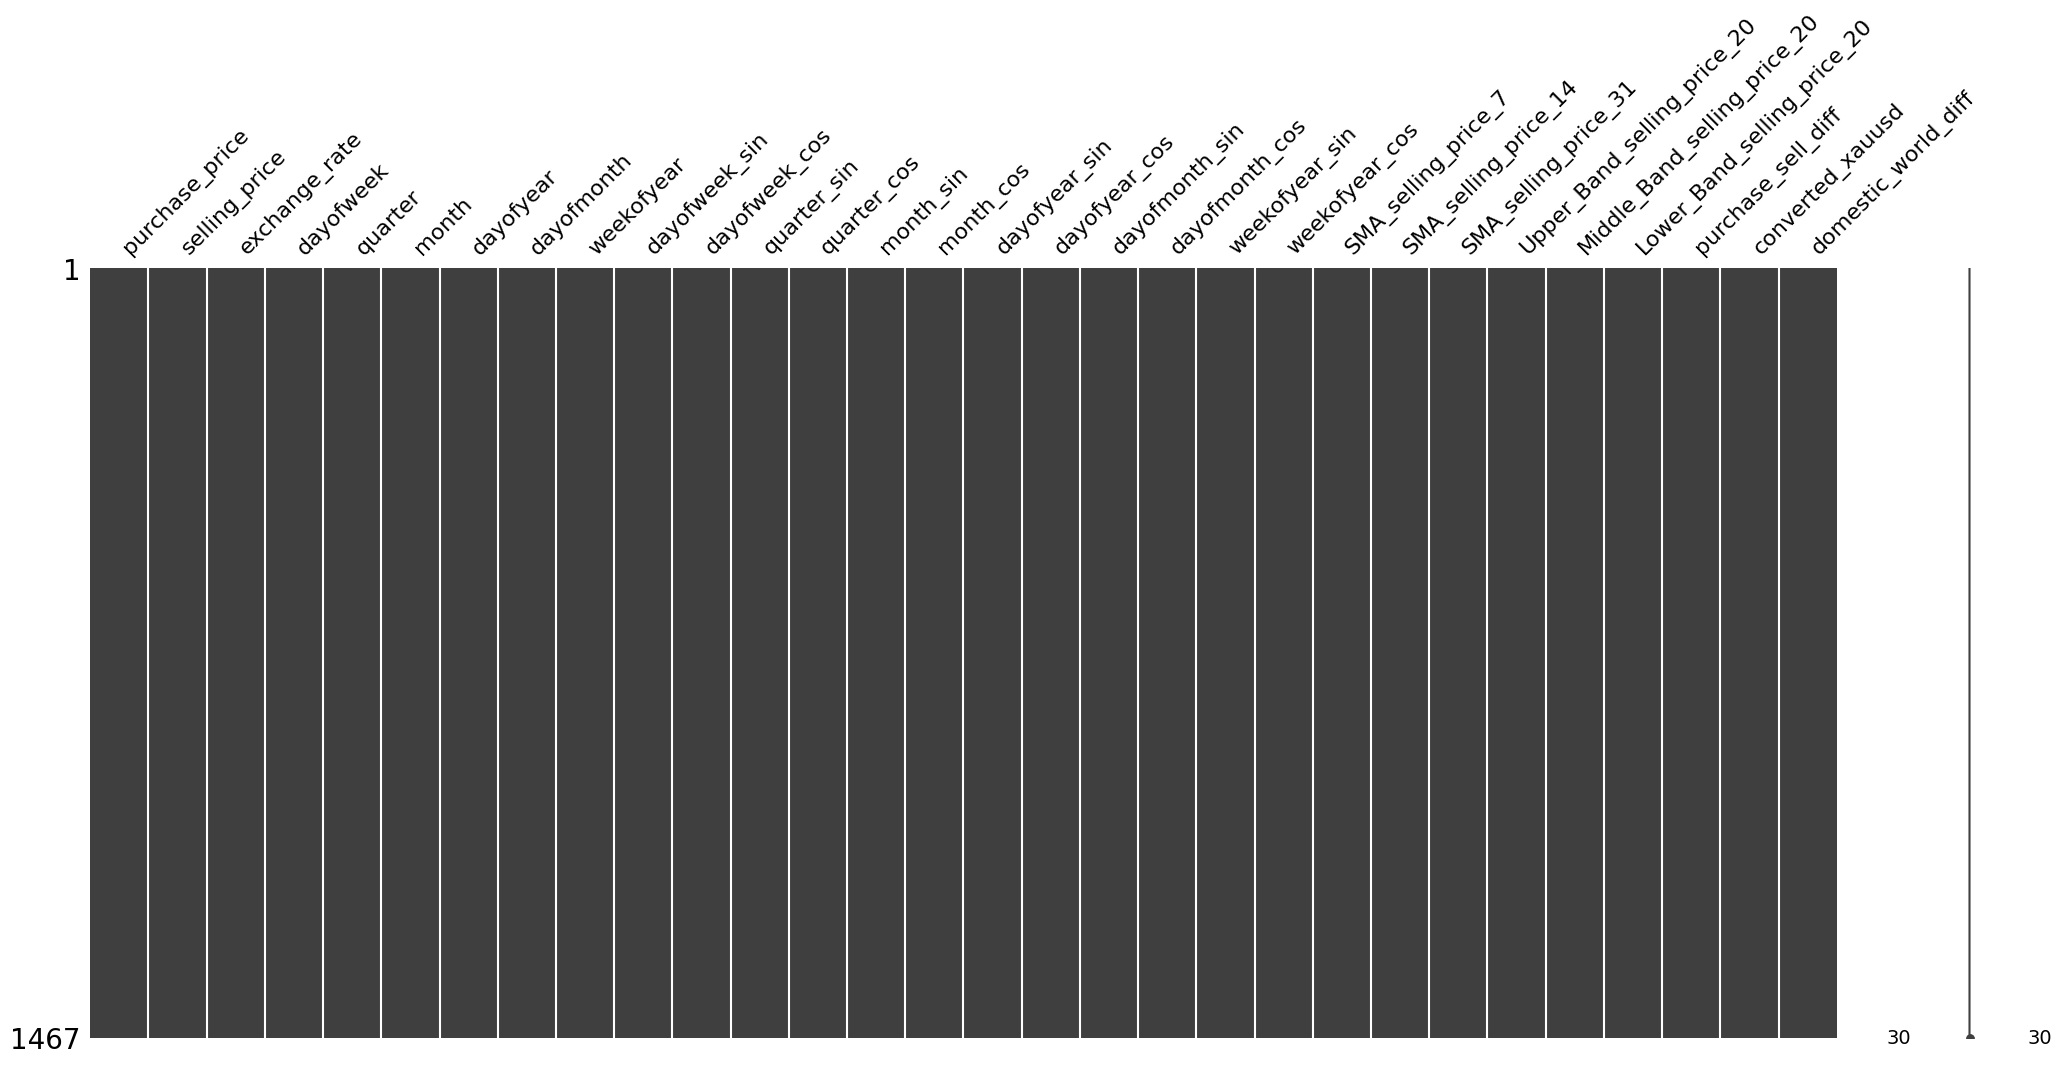

In [ ]:
# Visualize any missing values
msno.matrix(df_engineered)

In [ ]:
# Percentage of missing values in each columns 
missing_value_percentage(df_engineered)

,Column Name,Missing Percentage
0,purchase_price,0.00
1,selling_price,0.00
2,exchange_rate,0.00
3,dayofweek,0.00
4,quarter,0.00
5,month,0.00
6,dayofyear,0.00
7,dayofmonth,0.00
8,weekofyear,0.00
9,dayofweek_sin,0.00


In [ ]:
# Drop rows with missing values
df_engineered = df_engineered.dropna()
df_engineered.head(5)

,purchase_price,selling_price,exchange_rate,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,dayofweek_sin,...,weekofyear_cos,SMA_selling_price_7,SMA_selling_price_14,SMA_selling_price_31,Upper_Band_selling_price_20,Middle_Band_selling_price_20,Lower_Band_selling_price_20,purchase_sell_diff,converted_xauusd,domestic_world_diff
date,,,,,,,,,,,,,,,,,,,,,
2020-02-01,44.20,44.85,23182.0,5,1,2,32,1,5,-8.660254e-01,...,0.829406,44.378571,44.125000,43.787097,44.813729,43.8975,42.981271,0.65,36.850346,7.999654
2020-02-02,44.20,44.95,23182.0,6,1,2,33,2,5,-2.449294e-16,...,0.829406,44.514286,44.235714,43.856452,44.965161,43.9775,42.989839,0.75,36.852689,8.097311
2020-02-03,43.80,44.60,23182.0,0,1,2,34,3,6,0.000000e+00,...,0.757511,44.578571,44.289286,43.908065,45.014238,44.0425,43.070762,0.80,36.587221,8.012779
2020-02-04,43.65,44.15,23182.0,1,1,2,35,4,6,8.660254e-01,...,0.757511,44.564286,44.296429,43.935484,45.006499,44.0800,43.153501,0.50,36.021095,8.128905
2020-02-05,43.25,43.75,23237.0,2,1,2,36,5,6,8.660254e-01,...,0.757511,44.500000,44.292857,43.950000,44.978635,44.1000,43.221365,0.50,36.154602,7.595398


<Axes: >

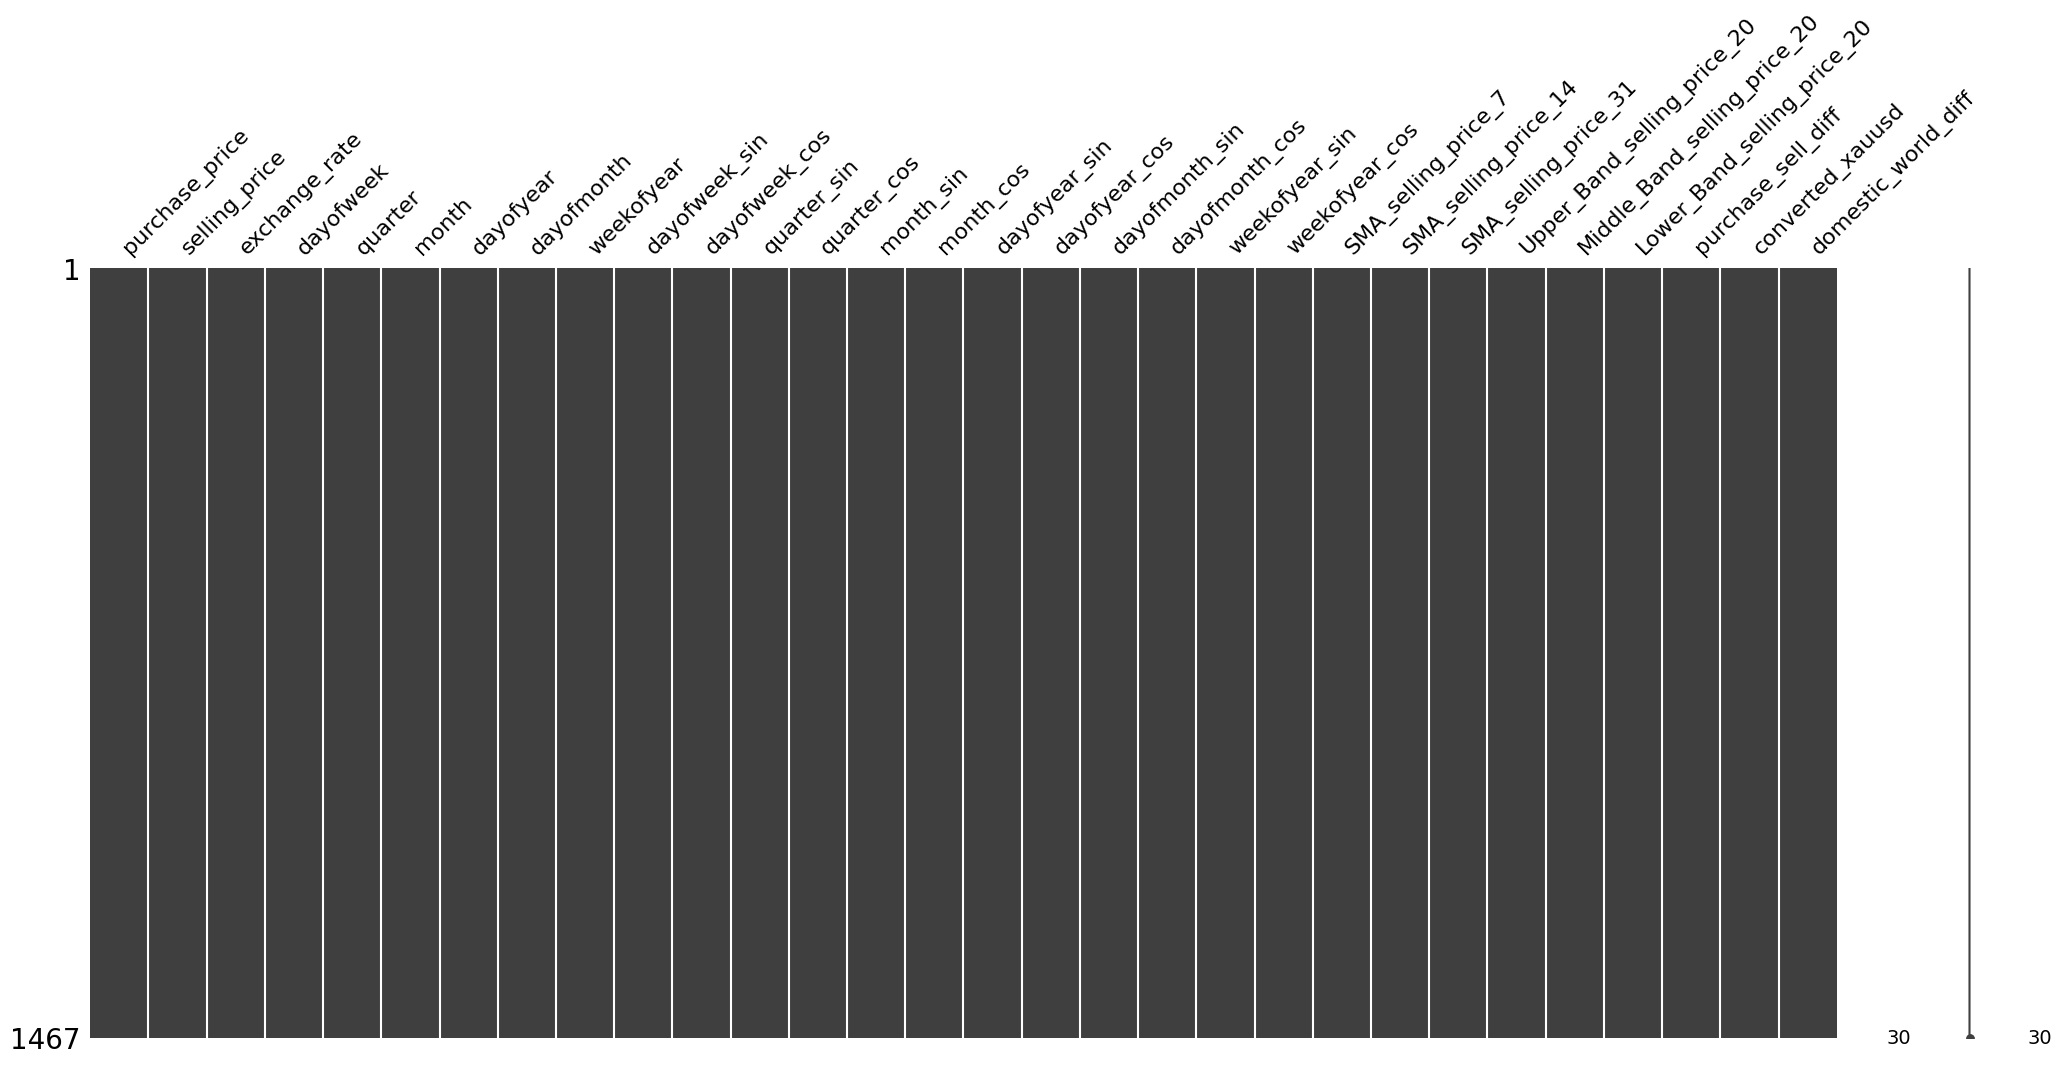

In [ ]:
# Missing values matrix
msno.matrix(df_engineered)

In [ ]:
# Missing value percentage
missing_value_percentage(df_engineered)

,Column Name,Missing Percentage
0,purchase_price,0.0
1,selling_price,0.0
2,exchange_rate,0.0
3,dayofweek,0.0
4,quarter,0.0
5,month,0.0
6,dayofyear,0.0
7,dayofmonth,0.0
8,weekofyear,0.0
9,dayofweek_sin,0.0


In [ ]:
# CoV of selling price
# CoV from 2020  onwards
print(f"CoV from 2020 onwards: {calc_cov(df_engineered.loc['2020-01-01':]['selling_price'])}")
# CoV from 2024 onwards
print(f"CoV from 2024 onwards: {calc_cov(df_engineered.loc['2024-01-01':]['selling_price'])}")

CoV from 2020 onwards: 0.12402663544445798
CoV from 2024 onwards: 0.01627723443005386


# **Export data**

In [ ]:
df_engineered.head(5)

,purchase_price,selling_price,exchange_rate,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,dayofweek_sin,...,weekofyear_cos,SMA_selling_price_7,SMA_selling_price_14,SMA_selling_price_31,Upper_Band_selling_price_20,Middle_Band_selling_price_20,Lower_Band_selling_price_20,purchase_sell_diff,converted_xauusd,domestic_world_diff
date,,,,,,,,,,,,,,,,,,,,,
2020-02-01,44.20,44.85,23182.0,5,1,2,32,1,5,-8.660254e-01,...,0.829406,44.378571,44.125000,43.787097,44.813729,43.8975,42.981271,0.65,36.850346,7.999654
2020-02-02,44.20,44.95,23182.0,6,1,2,33,2,5,-2.449294e-16,...,0.829406,44.514286,44.235714,43.856452,44.965161,43.9775,42.989839,0.75,36.852689,8.097311
2020-02-03,43.80,44.60,23182.0,0,1,2,34,3,6,0.000000e+00,...,0.757511,44.578571,44.289286,43.908065,45.014238,44.0425,43.070762,0.80,36.587221,8.012779
2020-02-04,43.65,44.15,23182.0,1,1,2,35,4,6,8.660254e-01,...,0.757511,44.564286,44.296429,43.935484,45.006499,44.0800,43.153501,0.50,36.021095,8.128905
2020-02-05,43.25,43.75,23237.0,2,1,2,36,5,6,8.660254e-01,...,0.757511,44.500000,44.292857,43.950000,44.978635,44.1000,43.221365,0.50,36.154602,7.595398


In [ ]:
df_engineered.shape

(1467, 30)

In [ ]:
df_engineered.to_csv(f"../data/processed_datasets/processed_datasets.csv")